In [1]:
!ls ..

data  datavisualizer  evaluator  papers  README.md  submissions


In [2]:
!ls ../data/dataset

tsd_train.csv  tsd_trial.csv


In [1]:
import __init__
import pandas as pd
from ast import literal_eval

trial = pd.read_csv("../data/dataset/tsd_trial.csv")
trial["spans"] = trial.spans.apply(literal_eval)
print("the shape of trial set is:", trial.shape)
display(trial.head(2))

the shape of trial set is: (690, 2)


,spans,text
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...
1,"[29, 30, 31, 32, 33, 34]",How about we stop protecting idiots and let na...


In [2]:
import random

# make an example with a taboo word
taboo_word = "fucking"
template = f"This is a {taboo_word} example."

# build a random baseline (yields offsets at random)
random_baseline = lambda text: [i for i, char in enumerate(text) if random.random()>0.5]
predictions = random_baseline(template)

# find the ground truth indices and print
gold = list(range(template.index(taboo_word), template.index(taboo_word)+len(taboo_word)))

print(f"Gold\t\t: {gold}")
print(f"Predicted\t: {predictions}")

Gold		: [10, 11, 12, 13, 14, 15, 16]
Predicted	: [3, 4, 5, 7, 8, 9, 12, 13, 14, 17, 19, 21, 24, 25]


In [18]:
#%tb
from evaluator.metrics import f1_score, evaluate, recall, precision

random.seed(3)

trial["random_predictions"] = trial.text.apply(random_baseline)
trial["f1_scores"] = trial.apply(lambda row: f1_score(row.spans, row.random_predictions), axis=1)
trial["recall"] = trial.apply(lambda row: recall(row.spans, row.random_predictions), axis=1)
trial["precision"] = trial.apply(lambda row: precision(row.spans, row.random_predictions), axis=1)

trial.head()

,spans,text,random_predictions,f1_scores,recall,precision
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...,"[1, 3, 4, 7, 10, 12, 14, 16, 17, 18, 19, 20, 2...",0.296296,0.800000,0.181818
1,"[29, 30, 31, 32, 33, 34]",How about we stop protecting idiots and let na...,"[0, 2, 4, 6, 7, 8, 9, 12, 16, 19, 21, 22, 25, ...",0.106667,0.666667,0.057971
2,"[166, 167, 168, 169, 170, 171]","If people were smart, they would Boycott th...","[0, 1, 3, 4, 7, 9, 12, 13, 15, 16, 17, 18, 20,...",0.060606,0.500000,0.032258
3,"[87, 88, 89, 90, 91, 92]",Trump Claimed that Russia will never invade th...,"[0, 5, 6, 7, 9, 12, 15, 18, 19, 25, 26, 28, 31...",0.101695,0.500000,0.056604
4,[],As long as your willing to pay a lot more for ...,"[0, 1, 4, 6, 7, 8, 10, 11, 12, 13, 14, 16, 18,...",0.000000,0.000000,0.000000


F1 = 0.18 ± 0.01
R = 0.47 ± 0.01
P = 0.14 ± 0.01


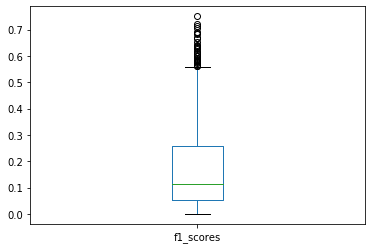

In [19]:
from scipy.stats import sem

_ = trial.f1_scores.plot(kind="box")

print (f"F1 = {trial.f1_scores.mean():.2f} ± {sem(trial.f1_scores):.2f}")
print (f"R = {trial.recall.mean():.2f} ± {sem(trial.recall):.2f}")
print (f"P = {trial.precision.mean():.2f} ± {sem(trial.precision):.2f}")

In [17]:
f1, p, r = evaluate(trial.spans.tolist(), trial.random_predictions.tolist())
print("F1-Score :", f1 )
print("Precision:", p)
print("Recall   :", r)

F1-Score : 0.17558205140514688
Precision: 0.14355952186030216
Recall   : 0.46936102424581644


In [10]:
predictions = trial.random_predictions.to_list()
ids = trial.index.to_list()

with open("spans-pred.txt", "w") as out:
    for uid, text_scores in zip(ids, predictions):
        out.write(f"{str(uid)}\t{str(text_scores)}\n")

In [11]:
!zip -r random_predictions.zip ./spans-pred.*

  adding: spans-pred.txt (deflated 77%)


In [12]:
! rm spans-pred.txt
! unzip random_predictions.zip

Archive:  random_predictions.zip
  inflating: spans-pred.txt          
